Vil undersøke sammenheng mellom simultan, marginal og betinget fordeling ved å betrakte en uniformfordeling på enhetsdisken
$$
\{(x,y):|x|\leq 1,|y|\leq 1\}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

In [2]:
N = 50000
mean = [0,0]
var = [[1,.5],[.5,3]]
norm = multivariate_normal(mean,var)
z = norm.rvs(N)
x,y = z[:,0], z[:,1]

Kan betinge av hendelse.. for eksempel $f_{Y|X>2}(x)$

Analytisk er det mulig å beting av at Y har eksakte verdier, men med sampling må jeg ta utgangspunkt i grid av intervaller

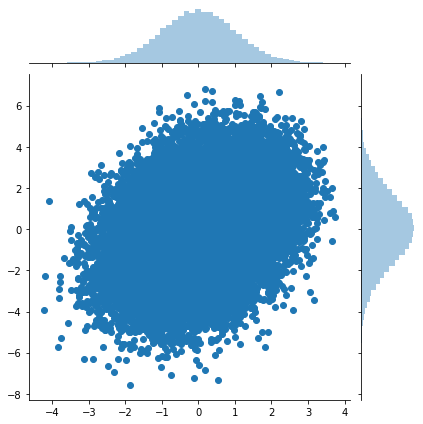

In [3]:
sns.jointplot(x,y)

[Text(0, 0.5, '$E_{\\hat{P}}[Y|X=x]$'), Text(0.5, 0, 'x')]

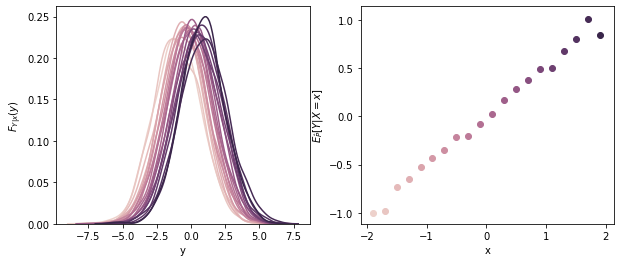

In [12]:
fig, (ax0,ax1) = plt.subplots(1,2,figsize=(10,4))
grid = np.arange(-2,2.1,.2)

sns.set_palette(sns.cubehelix_palette(9))

for j in grid[1:]:
    y_sub = y[(z[:,0]> j-.2) & (z[:,0]<j)]
    sns.distplot(y_sub,hist=False,ax=ax0)
    ax1.scatter(j-.1,y_sub.mean())
ax0.set(xlabel='y',ylabel=r'$F_{Y|x}(y)$')
ax1.set(xlabel='x',ylabel=r'$E_{\hat{P}}[Y|X=x]$')

vet ikke om dette var beste illustrasjonen.. må finnes enklere måter å vise betinget på.. kanskje diskret variabler.

In [10]:
M = np.random.choice([1,0],N)
μ_M = 100
y = np.empty(N)
for n in range(N):
    if M[n]:
        y[n] = np.random.normal(100,15)
    else:
        y[n] = np.random.normal(70,10)

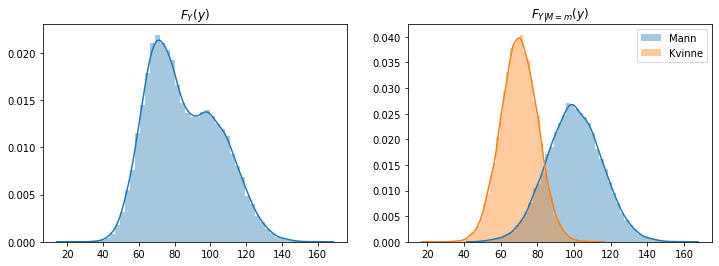

In [19]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
sns.distplot(y,ax=axes[0])
sns.distplot(y[M==1],label='Mann',ax=axes[1])
sns.distplot(y[M==0],label='Kvinne',ax=axes[1])
axes[1].legend()

axes[0].title.set_text(r'$F_Y(y)$')
axes[1].title.set_text(r'$F_{Y|M=m}(y)$')